In [1]:
suppressPackageStartupMessages(suppressWarnings({
    library("ggplot2")
    library(dplyr)
    library(tidyr)
    library(ComplexHeatmap)
    library(tibble)
    library(RColorBrewer)
    library(circlize)
}))


In [2]:
# show all columns
options(repr.matrix.max.cols=200, repr.matrix.max.rows=100)

In [3]:
profile_path <- file.path("../../data/CP_scDINO_features/combined_CP_scDINO_norm_fs.parquet")
figure_path <- file.path("../figures/")
if (!dir.exists(figure_path)) {
    dir.create(figure_path, recursive = TRUE)
}
df <- arrow::read_parquet(profile_path)
# get the metadata columns only 
metadata_df <- df %>% 
  select(contains("Metadata"))

metadata_df$unique_cell <- paste0(
    metadata_df$Metadata_track_id, "_", 

    metadata_df$Metadata_Well, "_", 
    metadata_df$Metadata_FOV, "_", 
    metadata_df$Metadata_dose
    )
# sort by Metadata_Well
metadata_df <- metadata_df %>% 
  arrange(Metadata_Well, Metadata_FOV, Metadata_dose)
head(metadata_df,1)

Metadata_plate,Metadata_Well,Metadata_number_of_singlecells,Metadata_compound,Metadata_dose,Metadata_control,Metadata_ImageNumber,Metadata_FOV,Metadata_Time,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ImageNumber_1,Metadata_ImageNumber_2,Metadata_ImageNumber_3,Metadata_Nuclei_Number_Object_Number,Metadata_Image_FileName_CL_488_1,Metadata_Image_FileName_CL_488_2,Metadata_Image_FileName_CL_561,Metadata_Image_FileName_DNA,Metadata_Image_PathName_CL_488_2,Metadata_Image_PathName_CL_561,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_coordinates_x,Metadata_track_id,Metadata_t,Metadata_y,Metadata_x,Metadata_id,Metadata_parent_track_id,Metadata_parent_id,Metadata_coordinates_y,Metadata_distance,Metadata_image_path,unique_cell
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list<double>>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<list<double>>,<dbl>,<chr>,<chr>
1,C-02,180,Staurosporine,0.0,negative,1,0001,0.0,101,101,100,1,1,1,100.0,C-02_F0001_T0001_Z0001_C02_illumcorrect.tiff,C-02_F0001_T0001_Z0001_C03_illumcorrect.tiff,C-02_F0001_T0001_Z0001_C04_illumcorrect.tiff,C-02_F0001_T0001_Z0001_C01_illumcorrect.tiff,/gpfs/alpine1/scratch/mlippincott@xsede.org/live_cell_timelapse_apoptosis/2.cellprofiler_ic_processing/illum_directory/timelapse/20231017ChromaLive_6hr_4ch_MaxIP_C-02_F0001,/gpfs/alpine1/scratch/mlippincott@xsede.org/live_cell_timelapse_apoptosis/2.cellprofiler_ic_processing/illum_directory/timelapse/20231017ChromaLive_6hr_4ch_MaxIP_C-02_F0001,1583.286,1078.899,"1583.286, 1078.899",17,0,1079,1583,1000096,-1,-1,"1583, 1079",0.3037024,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_100.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_100.0_crop.tiff,17_C-02_0001_0.0


In [4]:
plotting_df <- metadata_df %>% 
  select(c(
    "Metadata_Time", 
    "Metadata_dose",
    "unique_cell"
    ))
plotting_df$Metadata_dose <- as.numeric(plotting_df$Metadata_dose)
plotting_df$values <- 1
# sort by metadata dose
plotting_df <- plotting_df %>% 
  arrange(Metadata_dose)
# drop dose column
plotting_df <- plotting_df %>% 
  select(-Metadata_dose)


In [ ]:
# pivot wide such that the Metadata_id in the columns
plotting_df <- plotting_df %>% 
  pivot_wider(
    names_from = unique_cell,
    values_from = values
  )
head(plotting_df)

Metadata_Time,17_C-02_0001_0.0,18_C-02_0001_0.0,5_C-02_0001_0.0,19_C-02_0001_0.0,20_C-02_0001_0.0,22_C-02_0001_0.0,23_C-02_0001_0.0,24_C-02_0001_0.0,25_C-02_0001_0.0,26_C-02_0001_0.0,6_C-02_0001_0.0,29_C-02_0001_0.0,30_C-02_0001_0.0,7_C-02_0001_0.0,8_C-02_0001_0.0,9_C-02_0001_0.0,10_C-02_0001_0.0,12_C-02_0001_0.0,13_C-02_0001_0.0,15_C-02_0001_0.0,16_C-02_0001_0.0,99_C-02_0001_0.0,101_C-02_0001_0.0,105_C-02_0001_0.0,108_C-02_0001_0.0,37_C-02_0001_0.0,109_C-02_0001_0.0,110_C-02_0001_0.0,111_C-02_0001_0.0,114_C-02_0001_0.0,115_C-02_0001_0.0,116_C-02_0001_0.0,117_C-02_0001_0.0,118_C-02_0001_0.0,119_C-02_0001_0.0,120_C-02_0001_0.0,121_C-02_0001_0.0,38_C-02_0001_0.0,122_C-02_0001_0.0,124_C-02_0001_0.0,123_C-02_0001_0.0,125_C-02_0001_0.0,126_C-02_0001_0.0,127_C-02_0001_0.0,128_C-02_0001_0.0,129_C-02_0001_0.0,130_C-02_0001_0.0,131_C-02_0001_0.0,132_C-02_0001_0.0,133_C-02_0001_0.0,134_C-02_0001_0.0,137_C-02_0001_0.0,138_C-02_0001_0.0,139_C-02_0001_0.0,140_C-02_0001_0.0,141_C-02_0001_0.0,39_C-02_0001_0.0,40_C-02_0001_0.0,41_C-02_0001_0.0,42_C-02_0001_0.0,43_C-02_0001_0.0,44_C-02_0001_0.0,45_C-02_0001_0.0,46_C-02_0001_0.0,48_C-02_0001_0.0,49_C-02_0001_0.0,50_C-02_0001_0.0,51_C-02_0001_0.0,52_C-02_0001_0.0,11_C-02_0001_0.0,53_C-02_0001_0.0,54_C-02_0001_0.0,55_C-02_0001_0.0,56_C-02_0001_0.0,57_C-02_0001_0.0,58_C-02_0001_0.0,60_C-02_0001_0.0,61_C-02_0001_0.0,62_C-02_0001_0.0,63_C-02_0001_0.0,64_C-02_0001_0.0,65_C-02_0001_0.0,66_C-02_0001_0.0,67_C-02_0001_0.0,68_C-02_0001_0.0,70_C-02_0001_0.0,69_C-02_0001_0.0,71_C-02_0001_0.0,72_C-02_0001_0.0,73_C-02_0001_0.0,74_C-02_0001_0.0,77_C-02_0001_0.0,78_C-02_0001_0.0,79_C-02_0001_0.0,80_C-02_0001_0.0,81_C-02_0001_0.0,82_C-02_0001_0.0,83_C-02_0001_0.0,84_C-02_0001_0.0,⋯,132_E-11_0004_156.25,133_E-11_0004_156.25,134_E-11_0004_156.25,13_E-11_0004_156.25,19_E-11_0004_156.25,24_E-11_0004_156.25,25_E-11_0004_156.25,26_E-11_0004_156.25,27_E-11_0004_156.25,28_E-11_0004_156.25,29_E-11_0004_156.25,30_E-11_0004_156.25,31_E-11_0004_156.25,32_E-11_0004_156.25,36_E-11_0004_156.25,38_E-11_0004_156.25,39_E-11_0004_156.25,40_E-11_0004_156.25,41_E-11_0004_156.25,42_E-11_0004_156.25,44_E-11_0004_156.25,45_E-11_0004_156.25,46_E-11_0004_156.25,48_E-11_0004_156.25,49_E-11_0004_156.25,50_E-11_0004_156.25,52_E-11_0004_156.25,53_E-11_0004_156.25,54_E-11_0004_156.25,3_E-11_0004_156.25,55_E-11_0004_156.25,56_E-11_0004_156.25,57_E-11_0004_156.25,58_E-11_0004_156.25,60_E-11_0004_156.25,62_E-11_0004_156.25,63_E-11_0004_156.25,64_E-11_0004_156.25,65_E-11_0004_156.25,66_E-11_0004_156.25,67_E-11_0004_156.25,68_E-11_0004_156.25,69_E-11_0004_156.25,5_E-11_0004_156.25,70_E-11_0004_156.25,71_E-11_0004_156.25,72_E-11_0004_156.25,73_E-11_0004_156.25,74_E-11_0004_156.25,75_E-11_0004_156.25,76_E-11_0004_156.25,78_E-11_0004_156.25,79_E-11_0004_156.25,80_E-11_0004_156.25,81_E-11_0004_156.25,82_E-11_0004_156.25,84_E-11_0004_156.25,85_E-11_0004_156.25,139_E-11_0004_156.25,118_E-11_0004_156.25,119_E-11_0004_156.25,51_E-11_0004_156.25,136_E-11_0004_156.25,61_E-11_0004_156.25,4_E-11_0004_156.25,83_E-11_0004_156.25,138_E-11_0004_156.25,14_E-11_0004_156.25,23_E-11_0004_156.25,34_E-11_0004_156.25,35_E-11_0004_156.25,43_E-11_0004_156.25,142_E-11_0004_156.25,144_E-11_0004_156.25,37_E-11_0004_156.25,47_E-11_0004_156.25,2_E-11_0004_156.25,145_E-11_0004_156.25,15_E-11_0004_156.25,8_E-11_0004_156.25,94_E-11_0004_156.25,7_E-11_0004_156.25,151_E-11_0004_156.25,152_E-11_0004_156.25,154_E-11_0004_156.25,158_E-11_0004_156.25,17_E-11_0004_156.25,22_E-11_0004_156.25,87_E-11_0004_156.25,165_E-11_0004_156.25,166_E-11_0004_156.25,155_E-11_0004_156.25,147_E-11_0004_156.25,164_E-11_0004_156.25,172_E-11_0004_156.25,16_E-11_0004_156.25,99_E-11_0004_156.25,176_E-11_0004_156.25,167_E-11_0004_156.25,174_E-11_0004_156.25
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl

In [6]:
# replace NA with 0
plotting_df[is.na(plotting_df)] <- 0 
# turn the values into characters
# remove the dose column
plotting_df$Metadata_dose <- NULL
# remove the Metadata_Time column


In [7]:
# remove the Metadata_Time column
mat <- t(as.matrix(plotting_df))
colnames(mat) <- plotting_df$Metadata_Time
# drop the first row
mat <- mat[-1, ]
# add another column that is the sum of the columns
mat <- as.data.frame(mat)
# make the values numeric
mat <- mat %>% 
  mutate(across(where(is.character), as.numeric))
# add a column that is the sum of the columns
mat$sum <- rowSums(mat)
# remove the last column
# sort the matrix by the sum column
# remove the last column
mat <- mat %>% 
  select(-c("sum"))
# make the values character
mat <- mat %>% 
  mutate(across(where(is.numeric), as.character))
# convert to a matrix
mat <- as.matrix(mat)

In [8]:
rows <- rownames(mat)
# get only the well names 
well_dose <- rows %>% 
  strsplit("_") %>% 
  sapply(function(x) x[4]) %>%
  as.data.frame() %>% 
rename(Metadata_dose = ".") %>% 
mutate(Metadata_dose = as.character(Metadata_dose)) 

In [9]:
# convert to a factor
well_dose$Metadata_dose <- factor(
    well_dose$Metadata_dose, 
    levels = c(
        "0.0", "0.61", "1.22", "2.44", "4.88", 
        "9.77", "19.53", "39.06", "78.13", "156.25"
    )
)


In [10]:
row_ha <- rowAnnotation(
    Dose = well_dose$Metadata_dose,
    
    annotation_legend_param = list(
        title_position = "topcenter",
        title_gp = gpar(fontsize = 16, angle = 0, fontface = "bold", hjust = 0.5),
        labels_gp = gpar(fontsize = 16, 
            # make annotation bar text bigger
            legend = gpar(fontsize = 16),
            annotation_name = gpar(fontsize = 16),
            legend_height = unit(20, "cm"),
            legend_width = unit(1, "cm"),
            # make legend taller
            legend_height = unit(10, "cm"),
            legend_width = unit(1, "cm"),
            legend_key = gpar(fontsize = 16)
            )
    ),


    col = list(
        Dose = c(
            "0.0" = "#57F2F2",
            "0.61" = "#63D6D6",
            "1.22" = "#65BABA",
            "2.44" = "#68A3A3",
            "4.88" = "#668A8A",
            "9.77" = "#5E7070",
            "19.53" = "#4B5757",
            "39.06" = "#2F3D3D",
            "78.13" = "#182424",
            "156.25" = "#030A0A"
        )
    ),


        
    annotation_name_side = "bottom",
    # make font size bigger
    annotation_name_gp = gpar(fontsize = 16)
    
)

In [11]:

# make 0 in the matrix Cell Absent and 1 Cell Present but not in the row names or column names
mat[mat == 0.0] <- "Cell Absent"
mat[mat == 1.0] <- "Cell Present"

colors = structure(
    c("#c8c8c8","#2a2a2a"), 
    names = c("Cell Absent", "Cell Present")
)

png 
  2

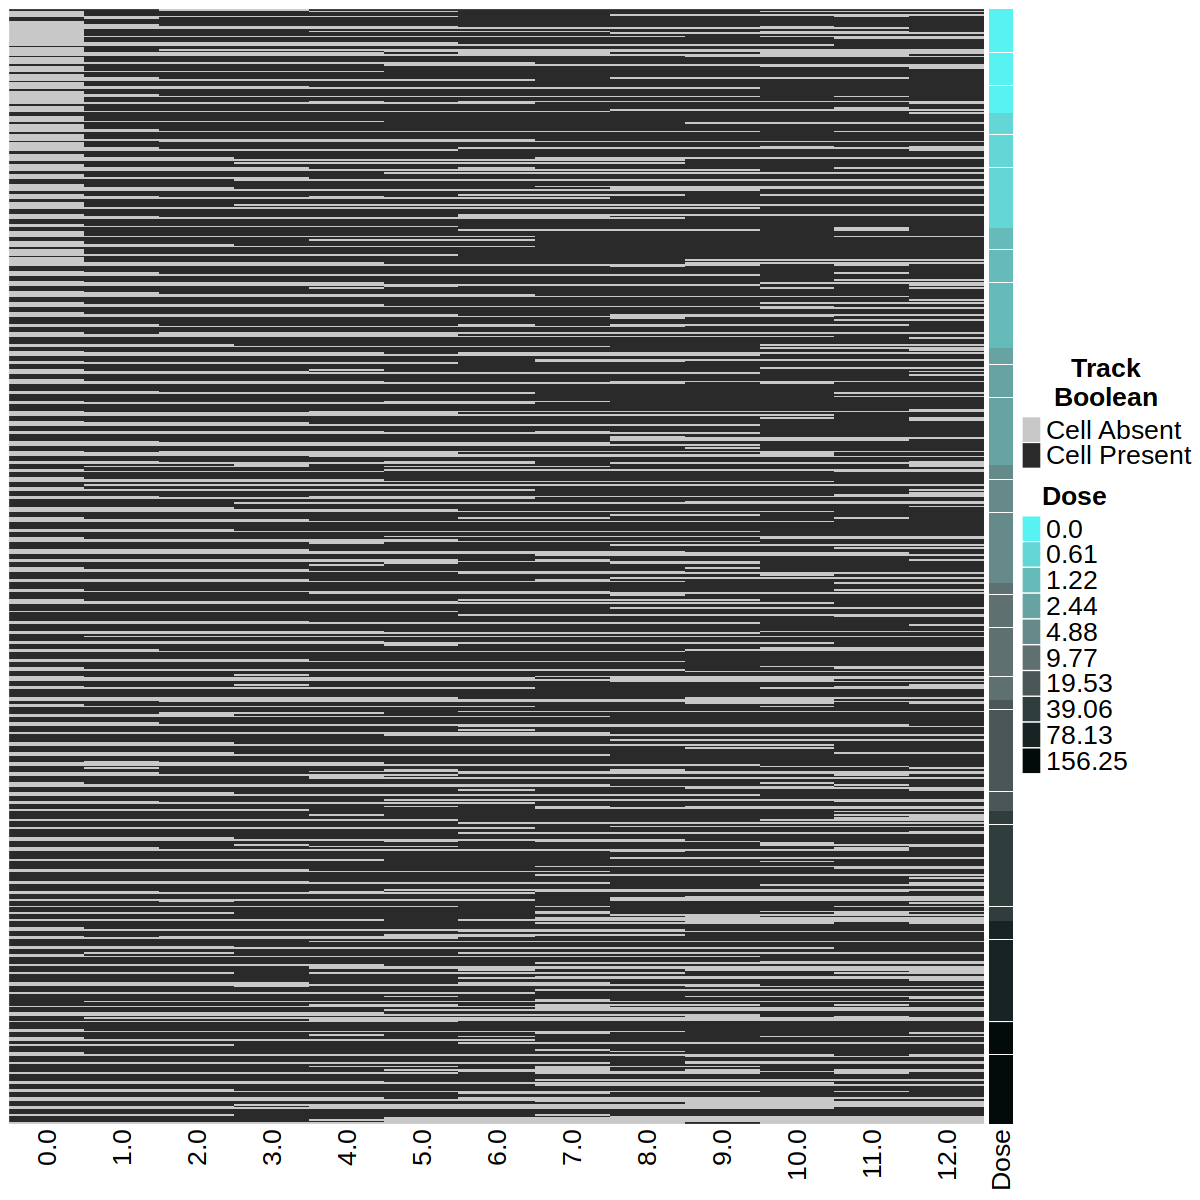

In [12]:
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
ht_opt$message = FALSE
heatmap <- Heatmap(
    mat, 
    cluster_rows = TRUE,    # Cluster rows
    # cluster_columns = FALSE, # Cluster columns
    show_row_names = FALSE,  # Show row names
    show_column_names = TRUE, # Show column names
    column_names_gp = gpar(fontsize = 16), # Column name label formatting
    row_names_gp = gpar(fontsize = 14),    # Row name label formatting
    right_annotation = row_ha,
    
    heatmap_legend_param = list(
                title = "Track\nBoolean",
                title_position = "topcenter", 
                title_gp = gpar(fontsize = 16, angle = 0, fontface = "bold", hjust = 0.5),
                labels_gp = gpar(fontsize = 16),
                legend_height = unit(6.6, "cm")
                ),
        # set color for 0 and 1
        col = colors,
    
)

png(filename = paste0(figure_path, "cell_tracks_over_time_heatmap.png"), width = width, height = height, units = "in", res = 600)
heatmap
dev.off()
heatmap